<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-d462c4460fe3>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Tarea 2: Generar estad√≠sticas descriptivas y visualizaciones.

Para todas las visualizaciones, incluya un t√≠tulo en cada gr√°fico y las etiquetas adecuadas
Genere lo siguiente y explique sus conclusiones:

1.	Para el "Valor medio de las viviendas ocupadas por sus propietarios" proporcione un diagrama de caja (boxplot)

2.	Proporcione un diagrama de barras para la variable "r√≠o Charles

3.	Proporcione un boxplot para la variable MEDV frente a la variable EDAD. (Discretice la variable edad en tres grupos de 35 a√±os o menos, entre 35 y 70 a√±os y 70 a√±os o m√°s)

4.	Proporcione un diagrama de dispersi√≥n para mostrar la relaci√≥n entre las concentraciones de √≥xido n√≠trico y la proporci√≥n de acres comerciales no minoristas por ciudad. ¬øQu√© puede decir sobre la relaci√≥n?

5.	Cree un histograma para la variable proporci√≥n de alumnos por profesor

In [5]:
boston_df.head()

Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2

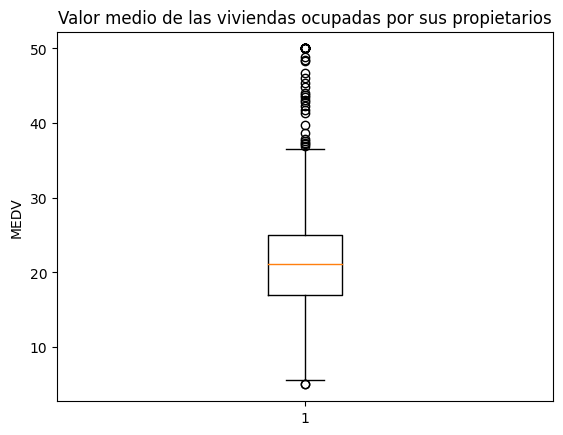

In [6]:
#Para el "Valor medio de las viviendas ocupadas por sus propietarios" proporcione un diagrama de caja (boxplot)
plt.boxplot(x=boston_df['MEDV'])
plt.ylabel("MEDV")
plt.title("Valor medio de las viviendas ocupadas por sus propietarios")
plt.show()


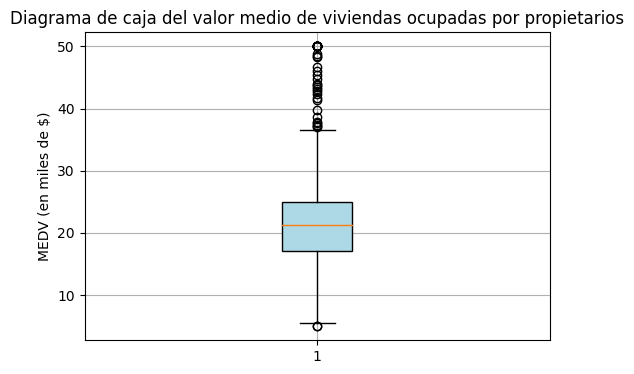

In [7]:
#Para el "Valor medio de las viviendas ocupadas por sus propietarios" proporcione un diagrama de caja (boxplot)
plt.figure(figsize=(6, 4))  # Tama√±o del gr√°fico
plt.boxplot(boston_df['MEDV'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.ylabel("MEDV (en miles de $)")
plt.title("Diagrama de caja del valor medio de viviendas ocupadas por propietarios")
plt.grid(True)
plt.show()

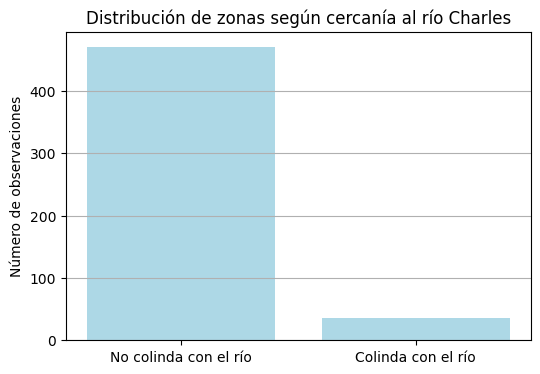

In [8]:
#Proporcione un diagrama de barras para la variable "r√≠o Charles}
chas_counts = boston_df['CHAS'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(chas_counts.index,chas_counts.values,color="lightblue")
plt.xticks([0, 1], ['No colinda con el r√≠o', 'Colinda con el r√≠o'])
plt.ylabel('N√∫mero de observaciones')
plt.title('Distribuci√≥n de zonas seg√∫n cercan√≠a al r√≠o Charles')
plt.grid(axis='y')
plt.show()

<Figure size 800x500 with 0 Axes>

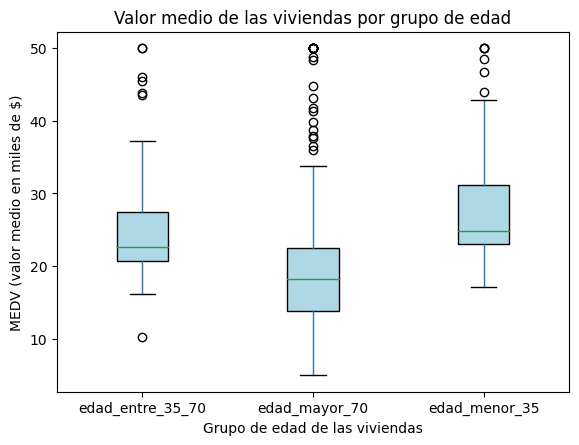

In [9]:
#Proporcione un boxplot para la variable MEDV frente a la variable EDAD. 
#(Discretice la variable edad en tres grupos de 35 a√±os o menos, entre 35 y 70 a√±os y 70 a√±os o m√°s)

boston_df.loc[(boston_df['AGE']<=35),'age_group']='edad_menor_35'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age_group']='edad_entre_35_70'
boston_df.loc[(boston_df['AGE']>=70),'age_group']='edad_mayor_70'
boston_df.head()

plt.figure(figsize=(8, 5))
boston_df.boxplot(column='MEDV', by='age_group', grid=False, patch_artist=True,
                  boxprops=dict(facecolor='lightblue'))

plt.title('Valor medio de las viviendas por grupo de edad')
plt.suptitle('')  # Elimina el t√≠tulo autom√°tico
plt.xlabel('Grupo de edad de las viviendas')
plt.ylabel('MEDV (valor medio en miles de $)')
plt.show()

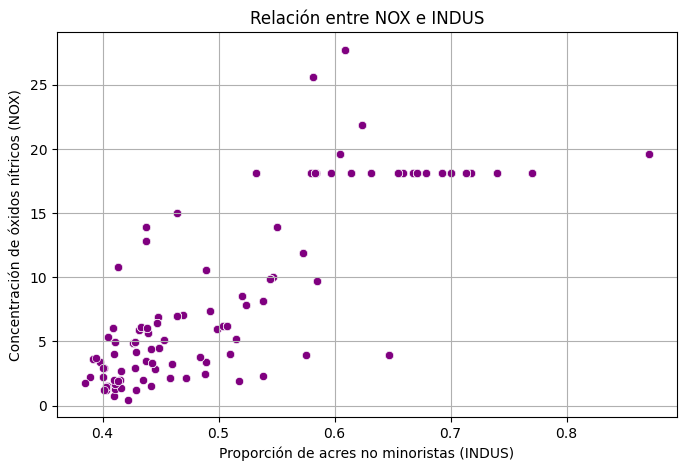

In [10]:
#Proporcione un diagrama de dispersi√≥n para mostrar la relaci√≥n entre las concentraciones de √≥xido n√≠trico 
#y la proporci√≥n de acres comerciales no minoristas por ciudad. ¬øQu√© puede decir sobre la relaci√≥n?

plt.figure(figsize=(8, 5))
sns.scatterplot(x=boston_df['NOX'],y=boston_df['INDUS'],color='purple')
plt.title('Relaci√≥n entre NOX e INDUS')
plt.xlabel('Proporci√≥n de acres no minoristas (INDUS)')
plt.ylabel('Concentraci√≥n de √≥xidos n√≠tricos (NOX)')
plt.grid(True)
plt.show()

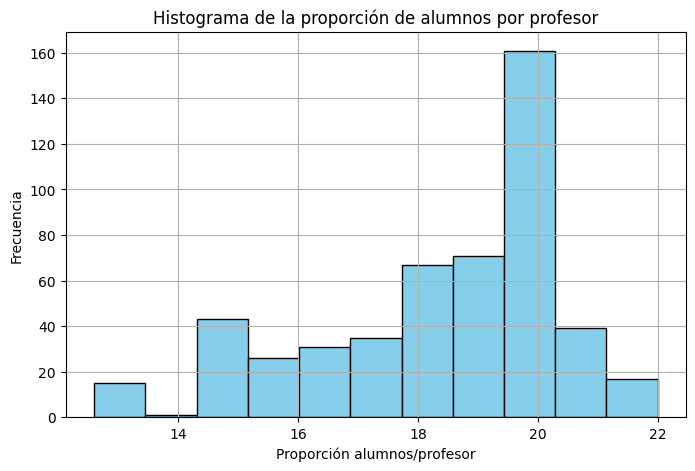

In [11]:
#Cree un histograma para la variable proporci√≥n de alumnos por profesor

plt.figure(figsize=(8, 5))
boston_df['PTRATIO'].plot(kind='hist', bins=11, color='skyblue', edgecolor='black')
plt.title('Histograma de la proporci√≥n de alumnos por profesor')
plt.xlabel('Proporci√≥n alumnos/profesor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Tarea 3: Utilice las pruebas adecuadas para responder a las preguntas que se le plantean.
Para cada una de las siguientes preguntas

‚Ä¢	¬øExiste una diferencia significativa en el valor medio de las casas delimitadas por el r√≠o Charles o no? (Prueba T para muestras independientes)

‚Ä¢	¬øExiste alguna diferencia en los valores medios de las casas (MEDV) para cada proporci√≥n de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)

‚Ä¢	¬øPodemos concluir que no existe relaci√≥n entre las concentraciones de √≥xido n√≠trico y la proporci√≥n de acres comerciales no minoristas por ciudad? (Correlaci√≥n de Pearson)

‚Ä¢	¬øCu√°l es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (An√°lisis de regresi√≥n)
Aseg√∫rese de:

1.	Enunciar su hip√≥tesis.

2.	Utilizar Œ± = 0,05

3.	Realice la prueba Estad√≠stica.

4.	Exponga la conclusi√≥n de la prueba.


In [12]:
#¬øExiste una diferencia significativa en el valor medio de las casas delimitadas 
#por el r√≠o Charles o no? (Prueba T para muestras independientes)
from scipy.stats import ttest_ind

print("Hip√≥tesis nula (H‚ÇÄ): El valor medio de las viviendas es igual para ambos grupos: ùúá1=ùúá0")
print("Hip√≥tesis alternativa (H‚ÇÅ): El valor medio de las viviendas difiere entre los grupos: ùúá1‚â†ùúá0")


medv_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_val = ttest_ind(medv_1, medv_0, equal_var=False)

print('Estadistico t:', round(t_stat,4))
print('Valor p:',round(p_val,4))


# Conclusi√≥n r√°pida
if p_val < 0.05:
    print("Se rechaza la hipotesis nula, existe una diferencia significativa en el valor medio de las viviendas seg√∫n la cercan√≠a al r√≠o Charles.")
else:
    print("No se rechaza la hipotesis nula, no se encontr√≥ una diferencia significativa en el valor medio de las viviendas seg√∫n la cercan√≠a al r√≠o Charles.")


Hip√≥tesis nula (H‚ÇÄ): El valor medio de las viviendas es igual para ambos grupos: ùúá1=ùúá0
Hip√≥tesis alternativa (H‚ÇÅ): El valor medio de las viviendas difiere entre los grupos: ùúá1‚â†ùúá0
Estadistico t: 3.1133
Valor p: 0.0036
Se rechaza la hipotesis nula, existe una diferencia significativa en el valor medio de las viviendas seg√∫n la cercan√≠a al r√≠o Charles.


In [13]:
#¬øExiste alguna diferencia en los valores medios de las casas (MEDV) para cada proporci√≥n 
#de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)
import scipy.stats as stats

print("Hip√≥tesis nula (H‚ÇÄ): Las medias de MEDV son iguales para todos los grupos de AGE. ùúá1=ùúá2=ùúá3=‚Ä¶")
print("Hip√≥tesis alternativa (H‚ÇÅ): Al menos un grupo tiene una media diferente.")

grupo1 = boston_df[boston_df['age_group'] == 'edad_menor_35']['MEDV']
grupo2 = boston_df[boston_df['age_group'] == 'edad_entre_35_70']['MEDV']
grupo3 = boston_df[boston_df['age_group'] == 'edad_mayor_70']['MEDV']

# Realizar ANOVA
f_stat, p_val = stats.f_oneway(grupo1, grupo2, grupo3)

print("Estadistico F:",round(f_stat,4))
print("Valor p:",p_val)

if p_val < 0.05:
    print("Se rechaza H‚ÇÄ, indicando que hay diferencias significativas en al menos un grupo.")
else:
    print("No se rechaza H‚ÇÄ, indicando que no hay evidencia suficiente para decir que las medias difieren.")


Hip√≥tesis nula (H‚ÇÄ): Las medias de MEDV son iguales para todos los grupos de AGE. ùúá1=ùúá2=ùúá3=‚Ä¶
Hip√≥tesis alternativa (H‚ÇÅ): Al menos un grupo tiene una media diferente.
Estadistico F: 36.4076
Valor p: 1.7105011022702984e-15
Se rechaza H‚ÇÄ, indicando que hay diferencias significativas en al menos un grupo.


In [14]:
# ¬øPodemos concluir que no existe relaci√≥n entre las concentraciones de √≥xido n√≠trico 
#y la proporci√≥n de acres comerciales no minoristas por ciudad? (Correlaci√≥n de Pearson)

from scipy.stats import pearsonr

print("Hip√≥tesis nula (H‚ÇÄ):No existe correlaci√≥n lineal entre NOX y INDUS (coeficiente de correlaci√≥n ùëü=0).")
print("Hip√≥tesis alternativa (H‚ÇÅ): Existe correlaci√≥n lineal diferente de cero (ùëü‚â†0)")

r, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Coeficiente de correlacion r:", round(r,4))
print("Valor p",p_val)

if p_val < 0.05:
    print("Se rechaza H‚ÇÄ, existe una relaci√≥n estad√≠sticamente significativa")
else:
    print("No se rechaza H‚ÇÄ,  no hay evidencia para afirmar que exista relaci√≥n.")


Hip√≥tesis nula (H‚ÇÄ):No existe correlaci√≥n lineal entre NOX y INDUS (coeficiente de correlaci√≥n ùëü=0).
Hip√≥tesis alternativa (H‚ÇÅ): Existe correlaci√≥n lineal diferente de cero (ùëü‚â†0)
Coeficiente de correlacion r: 0.7637
Valor p 7.913361061210442e-98
Se rechaza H‚ÇÄ, existe una relaci√≥n estad√≠sticamente significativa


In [15]:
#¬øCu√°l es el impacto de una distancia ponderada adicional a los cinco centros de empleo 
#de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (An√°lisis de regresi√≥n).

import statsmodels.api as sm

# Variables independientes y dependientes
X = boston_df['DIS']
y = boston_df['MEDV']

# Agregar constante para el intercepto
X = sm.add_constant(X)

# Ajustar modelo de regresi√≥n lineal
modelo = sm.OLS(y, X).fit()

# Resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        21:22:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0